In [0]:

#load libraries
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd
import scipy.io
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image  

from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import load_img

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [0]:
# Load Pre Train Models
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)
from tensorflow.keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)
from tensorflow.keras.applications.resnet50 import (
    ResNet50, preprocess_input, decode_predictions)
from keras.applications.inception_v3 import InceptionV3


# New Section

In [21]:
mat = scipy.io.loadmat("train_data.mat")
trainDF = pd.DataFrame(np.hstack((mat["train_fg_data"], mat["train_data"])))

trainDF.head()

,0,1,2,3,4,5,6,7,8,9,...,17366,17367,17368,17369,17370,17371,17372,17373,17374,17375
0,0.000433,0.000289,0.000289,0.000216,0.000144,0.000000,0.000000,0.000577,0.000000,0.000144,...,0.267177,0.357578,0.420985,0.409833,0.276110,0.346354,0.234670,0.212166,0.337528,0.268254
1,0.000000,0.000635,0.000698,0.000000,0.000000,0.000635,0.000698,0.000000,0.000000,0.000952,...,0.177962,0.309295,0.417339,0.379545,0.200530,0.253226,0.155548,0.143595,0.309500,0.177095
2,0.000000,0.000000,0.000000,0.000000,0.000599,0.000257,0.000428,0.000685,0.000086,0.000086,...,0.192064,0.320620,0.390572,0.373608,0.208791,0.279283,0.152269,0.169688,0.287026,0.204373
3,0.000000,0.000942,0.000000,0.000257,0.000000,0.000685,0.000000,0.000257,0.000086,0.000000,...,0.254010,0.353008,0.367482,0.375448,0.302831,0.309191,0.233176,0.188171,0.299682,0.234346
4,0.000132,0.000000,0.000066,0.000066,0.000000,0.000066,0.000000,0.000132,0.000066,0.000000,...,0.175661,0.299105,0.410328,0.354185,0.175331,0.244246,0.166500,0.135681,0.318807,0.171231


In [0]:
#Load the Xception model, Vgg Model, and resnet_model
xception_model = Xception(include_top=True, weights='imagenet')
vgg_model = VGG19(include_top=True, weights='imagenet')
resnet_model = ResNet50(include_top=True, weights='imagenet')
inception_model = InceptionV3(include_top=True, weights='imagenet') 

In [32]:
#onlyfiles = [f for f in listdir("./images") if isfile(join("./images", f))]
#onlyfiles

#for file in onlyfiles:
    #image_path = os.path.join("images",file)
    #img = image.load_img(image_path, target_size=image_size)
    #x = image.img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    #predictions = model.predict(x)
    #print('Predicted:', decode_predictions(predictions, top=3))
#     plt.imshow(img)
   # print(file)
  
filename = 'Testdog.jpg'
print(filename)                                                                             
#img = Image.open(filename)
#img.show() 

Testdog.jpg


In [0]:
# load an image in PIL format
#original = load_img(filename, target_size=(224, 224))
#print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()

# convert the PIL image to a numpy array
#IN PIL - image is in (width, height, channel)
#In Numpy - image is in (height, width, channel)
#numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
#print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
#image_batch = np.expand_dims(numpy_image, axis=0)
#print('image batch size', image_batch.shape)
#plt.imshow(np.uint8(image_batch[0]))

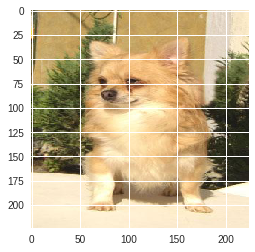

In [91]:
#Default Image Size for Xception
image_size = (224, 224)
image_size_vgg19 = (224, 224)
image_size_xception = (299, 299)
image_size_resnet = (224, 224)
image_size_inception = (299, 299)

#Load the image and resize to the input dimensions that Xception
#was trained with
image_path = os.path.join("Testdog.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [92]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x)

[[[[-37.939003   -8.778999   -2.6800003]
   [-16.939003    4.2210007   3.3199997]
   [-41.939003  -26.779     -32.68     ]
   ...
   [ 99.061     116.221     126.32     ]
   [ 99.061     116.221     126.32     ]
   [ 99.061     116.221     126.32     ]]

  [[-26.939003    2.2210007   8.32     ]
   [-35.939003  -14.778999  -15.68     ]
   [-51.939003  -36.779     -42.68     ]
   ...
   [101.061     118.221     128.32     ]
   [101.061     118.221     128.32     ]
   [101.061     118.221     128.32     ]]

  [[-17.939003   11.221001   17.32     ]
   [-19.939003    1.2210007   0.3199997]
   [-39.939003  -24.779     -30.68     ]
   ...
   [102.061     119.221     129.32     ]
   [102.061     119.221     129.32     ]
   [102.061     119.221     129.32     ]]

  ...

  [[100.061     116.221     124.32     ]
   [ 99.061     115.221     123.32     ]
   [ 99.061     115.221     123.32     ]
   ...
   [101.061     117.221     125.32     ]
   [101.061     117.221     125.32     ]
   [101.061     

Predicted: [('n02112018', 'Pomeranian', 0.7476658), ('n02085620', 'Chihuahua', 0.2352516), ('n02086079', 'Pekinese', 0.013284245)]


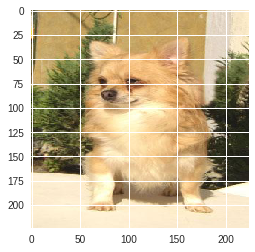

In [71]:
# Make predictions
predictions = resnet_model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

Predicted: [('n02112018', 'Pomeranian', 0.8883667), ('n02085620', 'Chihuahua', 0.07655261), ('n02112350', 'keeshond', 0.009180694)]


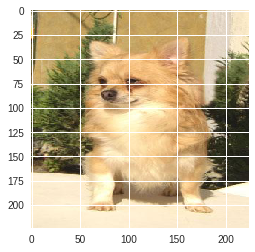

In [75]:
# Make predictions
predictions = vgg_model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

Predicted: [('n03775546', 'mixing_bowl', 0.99880636), ('n03942813', 'ping-pong_ball', 0.0010104127), ('n02112350', 'keeshond', 0.00017161222)]


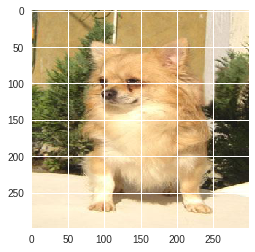

In [77]:
image_path = os.path.join("Testdog.jpg")
img = image.load_img(image_path, target_size=image_size_xception)
plt.imshow(img)

# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = xception_model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

Predicted: [('n03950228', 'pitcher', 0.6767092), ('n04131690', 'saltshaker', 0.3127602), ('n01924916', 'flatworm', 0.009863155)]


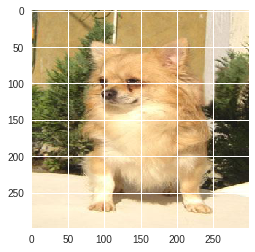

In [93]:
image_path = os.path.join("Testdog.jpg")
img = image.load_img(image_path, target_size=image_size_inception)
plt.imshow(img)

# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = inception_model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [102]:
    
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = [cat, cat, dog, bird, cat, bird, cat, dog, dog, cat] 
predicted = [cat, dog, dog, dog, bird, cat, cat, dog, cat, cat] 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
#print(results) 
#print('Accuracy Score :',accuracy_score(actual, predicted) 
#print('Report : '
#print(classification_report(actual, predicted) 

NameError: ignored

In [0]:
rint(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
## Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
#image_filenames = filter(lambda x: x.endswith(".jpg"), os.listdir("Images"))
# Sort in alphabetical order
#image_filenames = sorted(image_filenames)
# Get full paths to images
#paths_to_images = ["Images" + x for x in image_filenames]
# List of face encodings we have
#face_encodings = []
# Loop over images to get the encoding one by one
#for path_to_image in paths_to_images:
    # Get face encodings from the image
   # face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    #if len(face_encodings_in_image) != 1:
        #print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    # Append the face encoding found in that image to the list of face encodings we have
    #face_encodings.append(get_face_encodings(path_to_image)[0])
